In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Narrative analytics is the idea of telling a story with data
# it will play a key role in everything you do in this course and throughout your career in data science

In [3]:
# the job of a data scientist is not always narrative

# sometimes the job of a data scientist is to just gather and present information
# with as little influence on the process as possible

# This is a more passive form of data science, focused almost solely on the integrity of the data

In [4]:
# skills for passive analytics (the math, stats, data collection) are still necessary for narrative analytics
# Adding a narrative just puts another layer on top of that work

# learning the narrative form and how to make a case with data is a difficult skill to master
# requiring constant practice and reinforcement

# adding a narrative is often a key value add of a data scientist

In [5]:
# Any time you answer a question about data you're inherently summarizing the data
# That means something is going to be lost

# your job is not to tell the whole story but to tell the best one you can with the information you have at hand

# Sometimes it's to argue for a specific reaction
# Sometimes it's to present a certain version of events
# If you think sales are weak you're probably not going to compare to last year's average

In [6]:
# Recognize that any way you present your data presents a version of events
# It's not that one version is true or one is false, it's that they're different

# That's why asking the right question, and not just that but asking a lot of questions,
# is essential to finding out what is going on with your data.

In [7]:
# There are several key things to keep in mind when working with data to ensure
# that you arrive at the closest thing to truth you can find

# try not to decide a story before you look into the data
# The analysis you perform should inform the narrative you want to tell, not the other way around

# Always try to ask what else an answer could mean
# When you perform analytics, there is often a conclusion that is easiest to draw
# Seeing that sales had a down week could easily mean that sales are in trouble
# Spending the time to question that conclusion is one of the key features of a good data scientist

# be aware that you can always be wrong, conclusions aren't 100%
# There's never just one interpretation. Keep questioning what's going on. Keep asking more questions

In [8]:
# when we talk about the analysis we perform, the first is numeric summarization and analytics
# These are the kinds of things we talked about previously. Statistical tests, measures of central tendency
# The next are visualizations.

# Being able to make good visualizations is one of the most valuable skills a data scientist can possess

In [11]:
url = 'https://raw.githubusercontent.com/tategallery/collection/master/artist_data.csv'
artists = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/tategallery/collection/master/artwork_data.csv'
works = pd.read_csv(url)

In [ ]:
#Who are the most popular artists in the Tate Collection? Are there any outliers in terms of amount collected?

# Which artists and time periods has the Tate prioritized collecting?

Text(0, 0.5, 'Artworks Count')

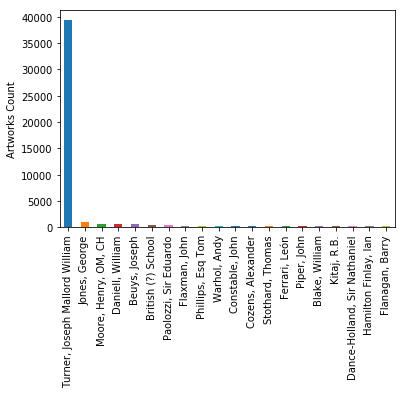

In [12]:
# First we'll approach artists

works.artist.value_counts().head(20).plot(kind='bar')
plt.ylabel('Artworks Count')

# This plot of artworks by artists for the top 20 artists really only shows us one thing
# (other than providing a list of the 20 most popular artists)
# The Tate has a lot of works by William Turner

Text(0, 0.5, 'Artworks Count')

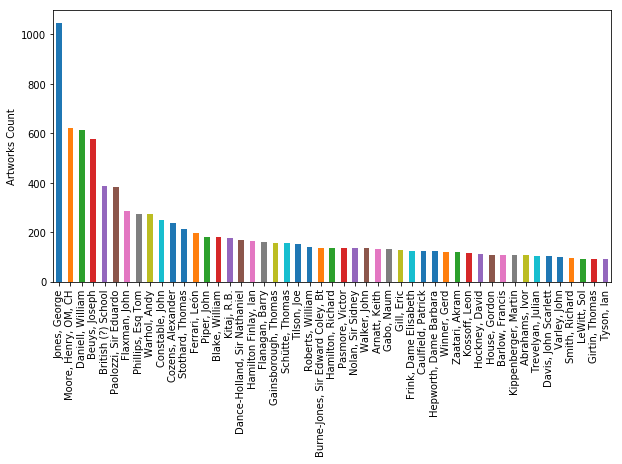

In [13]:
# To look at the relative popularity of other artists let's remove Turner

works.artist.value_counts().head(50)[1:51].plot(kind='bar', figsize=(10,5))
plt.ylabel('Artworks Count')

# So there seem to be a few other exceptionally popular artists
# with the first four or arguably six being collected in meaningfully larger numbers

In [ ]:
# 2 Who are the artists in the Tate collection? How does that vary by geography, age, and living or dead?

In [14]:
len(artists)

# So there are 3,532 artists in the Tate collection

3532

In [ ]:
# Where are they from?
# looking into the placeOfBirth variable, the format is inconsistent
# Sometimes the birthplace includes a city, others just a country.

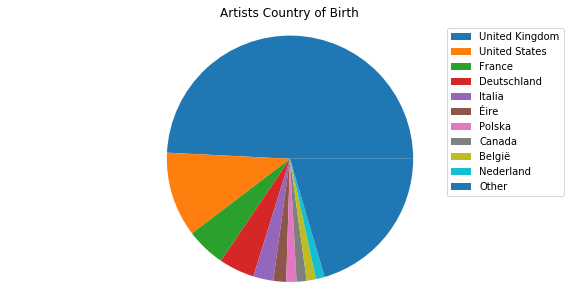

In [15]:
# Process data to create counts by country

# Split the place of birth on commas
locations = artists.placeOfBirth.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
countries = []

# Process countries and clean up text
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['country'])

# Create numeric counts
cntry_counts = pd.DataFrame(countries.country.value_counts())
other = int(cntry_counts[10:].sum())
cntry_counts = cntry_counts[:10]
cntry_counts.loc[11] = other
cntry_counts = cntry_counts.rename(index={11: 'Other'})

# Generate Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(cntry_counts.country)
plt.axis('equal')
plt.title('Artists Country of Birth')
plt.legend(cntry_counts.index)

In [ ]:
# about half of the artists in the collection are from the UK
# We can see here are that the US and Canada are the only two non-European countries in the top 10
# the "other" selection of countries is quite large, making up almost a quarter of the Tate collection

Text(0.5, 1.0, 'Artists Born by Year')

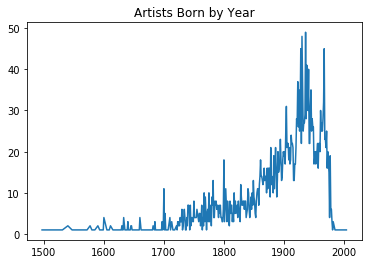

In [16]:
plt.plot(artists.yearOfBirth.value_counts().sort_index())
plt.title('Artists Born by Year')

# the closer to modern times we get, the more artists we have represented

In [ ]:
# some interesting peaks around the centuries that are perhaps worthy of further investigation
# Maybe they're using something other than artist's names to talk about movements?

Text(0, 0.5, 'Works Acquired')

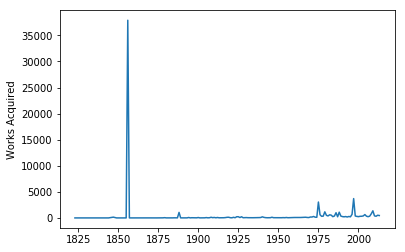

In [17]:
# How does this compare to when artworks were acquired?

acquisition_df = pd.DataFrame(works.acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

# This shows a collection that seems to have several peaks in its growth

Text(0, 0.5, 'Works Acquired')

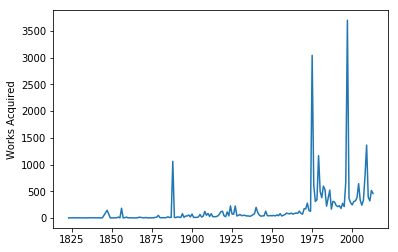

In [26]:
acquisition_df = pd.DataFrame(works[works.artist != 'Turner, Joseph Mallord William'].acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

# This shows a few more clear spikes but also a clear narrative that the collection has been growing more rapidly in recent years
# This aligns with the skew towards contemporary artists

Text(0.5, 1.0, 'Artists Who are No Longer Living')

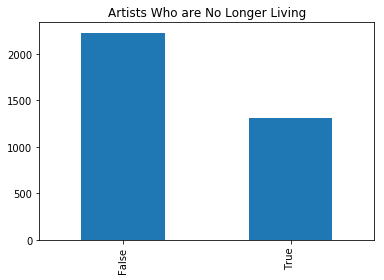

In [27]:
# Let's determine the portion of the artists who are living
# For this, we'll use year of death as an indicator.

living = pd.DataFrame(artists.yearOfDeath.isnull())
living = pd.DataFrame(living.yearOfDeath.value_counts())
living.plot(kind='bar', legend=False)
plt.title('Artists Who are No Longer Living')

# This shows a surprisingly large portion of the artists collected by the Tate are still living
# when put into context that the Tate is one of the largest supporters of contemporary art in Britain,
# hosting the largest prize for contemporary art with the Turner Prize, it does fit their profile

In [ ]:
#3 What are the most popular mediums and how does medium affect size?

# It would be tempting to start with medium just as the data provides it,
# However, this reveals a bit of a problem.

In [20]:
# There are way too many kinds of medium, and with a level of subtlety that we don't really want
# So we'll group some together

works.medium.value_counts().head(10)

Graphite on paper                            26167
Oil paint on canvas                           3383
Screenprint on paper                          2984
Lithograph on paper                           2721
Watercolour on paper                          1890
Etching on paper                              1793
Graphite and watercolour on paper             1680
Ink on paper                                   880
Intaglio print on paper                        820
Photograph, gelatin silver print on paper      750
Name: medium, dtype: int64

In [21]:
# We're also dropping Turner here because he has 25,000 works on paper that skew all counts towards that.

# Remove Turner
turnerless_artworks = works[works['artist'] != 'Turner, Joseph Mallord William']
# Coerce to Numeric
turnerless_artworks.height = pd.to_numeric(turnerless_artworks.height, errors = 'coerce')
turnerless_artworks.width = pd.to_numeric(turnerless_artworks.width, errors = 'coerce')
turnerless_artworks.depth = pd.to_numeric(turnerless_artworks.depth, errors = 'coerce')
turnerless_artworks = turnerless_artworks[turnerless_artworks['units']=='mm']
turnerless_artworks = turnerless_artworks[turnerless_artworks.height.notnull()]

## The error is just because of how we did the conditional select and we don't need to be worried about it...

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
# Aggregate to new medium_agg column
turnerless_artworks['medium_agg'] = 'other'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paper", na=False),'medium_agg'] = 'paper'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("canvas", na=False),'medium_agg'] = 'canvas'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("wood", na=False),'medium_agg'] = 'wood'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paint on", na=False),'medium_agg'] = 'other painted panel'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Bronze", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Plaster", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Marble", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Stone", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("plate", na=False),'medium_agg'] = 'plate'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("photograph", na=False),'medium_agg'] = 'photo'

turnerless_artworks['surface'] = turnerless_artworks.height * turnerless_artworks.width

In [23]:
turnerless_artworks[['medium_agg','height','width','depth','surface']].groupby('medium_agg').describe()

depth                                                 \
                     count         mean          std   min     25%    50%   
medium_agg                                                                  
canvas                83.0   134.957831   355.563519   5.5   27.50   35.0   
other                953.0   761.288772  1448.336740   3.0  125.00  300.0   
other painted panel  442.0    76.997738   290.694723   2.0   20.00   30.0   
paper                160.0   277.478125   695.113346   1.0   28.25   45.0   
photo                 32.0   215.968750   467.421236  18.0   25.00   39.5   
plate                  8.0  1997.625000  4215.212448  25.0   75.00  585.5   
sculpture            620.0   406.875806   504.036311   8.0  152.00  270.0   
wood                 208.0   548.336538   923.748764   6.0   91.50  260.0   

                                        height                ...     \
                         75%      max    count         mean   ...      
medium_agg                                                    ...      
canvas                 53.00   2185.0    260.0  1776.396154   ...      
other                 750.00  18290.0   1301.0  1189.179554   ...      
other painted panel    55.00   5486.0   4408.0  1032.772913   ...      
paper                 184.00   5000.0  19800.0   417.212288   ...      
photo                 146.50   2015.0    192.0  1286.786458   ...      
plate                1107.75  12360.0    344.0   347.148256   ...      
sculpture             445.00   5800.0    639.0   619.608764   ...      
wood                  510.00   6300.0    349.0  1067.189112   ...      

                       surface                 width               \
                           75%          max    count         mean   
medium_agg                                                          
canvas               4707935.5   21731950.0    259.0  1495.119691   
other                1597850.0   91253940.0   1298.0   960.942604   
other painted panel  1558060.5   36233100.0   4408.0   960.962568   
paper                 315810.0   32376000.0  19780.0   407.575925   
photo                1696120.0   54315000.0    190.0   973.368421   
plate                  69845.0    6549000.0    344.0   264.523256   
sculpture             662296.5   17964018.0    639.0   765.388106   
wood                 1247400.0  132462000.0    349.0  1065.908309   

                                                                          
                             std    min    25%     50%      75%      max  
medium_agg                                                                
canvas                890.336830  120.0  727.5  1410.0  2135.00   4860.0  
other                1019.110727    5.0  290.0   603.0  1314.75  10900.0  
other painted panel   639.367519   50.0  508.0   762.0  1244.25   4580.0  
paper                 326.287752    3.0  190.0   320.0   543.25   8454.0  
photo                 962.547810  100.0  380.0   608.0  1202.75   4892.0  
plate                 210.308546  102.0  229.0   229.0   229.00   2235.0  
sculpture             657.149556   19.0  304.0   533.0  1029.00   3750.0  
wood                 1145.166249   35.0  400.0   756.0  1310.00  11960.0  

[8 rows x 32 columns]

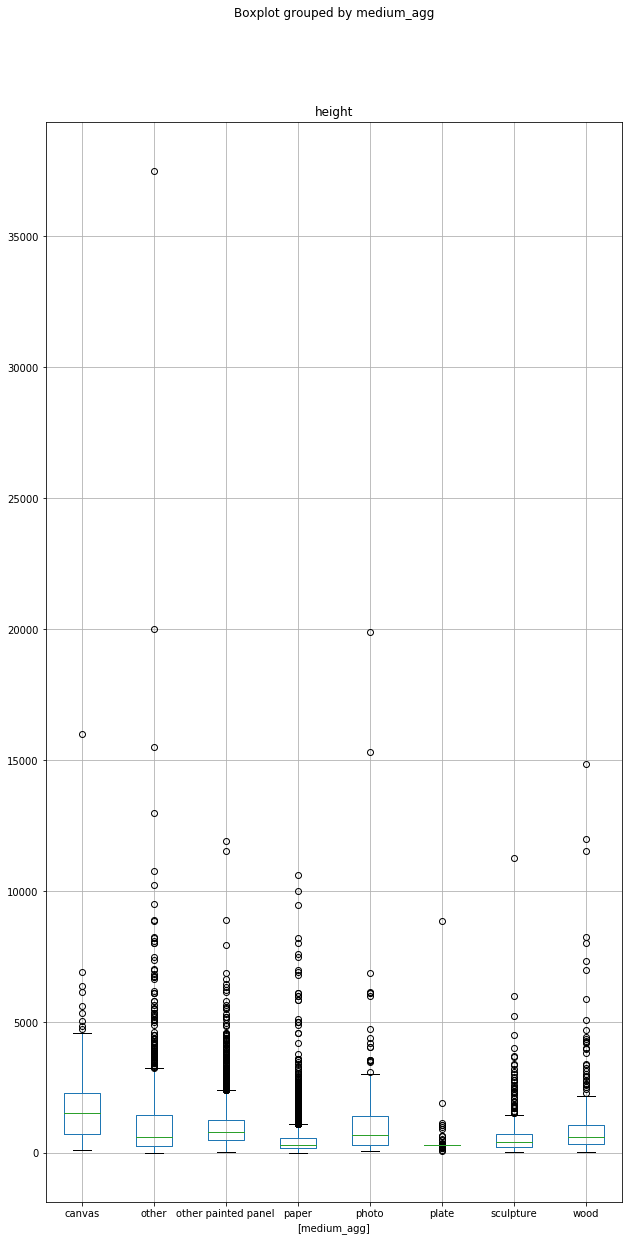

In [25]:
turnerless_artworks[['medium_agg', 'height']].boxplot(by='medium_agg', figsize=(10,20))

In [ ]:
# With a plot that large it's likely impossible to see all of it on a monitor at once
# However, keeping it makes a point, here are some exceptional outliers here

# The most striking is a steel piece by Miroslaw Balka measuring 37.5 meters high!

# We only included one of the plots, 
# it would be trivial to generate the same boxplot for width, depth, and surface area
# Admittedly there are also some works on paper over 10 meters high

# However, the bottom part of the plot has more generally applicable conclusions to show
# Plates are almost all the same size (this is things like copper plates by the way, not ceramic)
# Canvas is the largest in medium and 75th percentile, and therefore also the highest whisker.

# So as one would expect different mediums are generally different sizes but there is huge variation in the collection,
# so trying to predict medium off of size could be very difficult.